In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('international-airline-passengers.csv', 
                 header = None, 
                 names = ['date', 'pass'], 
                 parse_dates = ['date'], 
                 index_col = ['date'])
df.head()

,pass
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
# Stastical Description
df.describe()

,pass
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


### Plotting

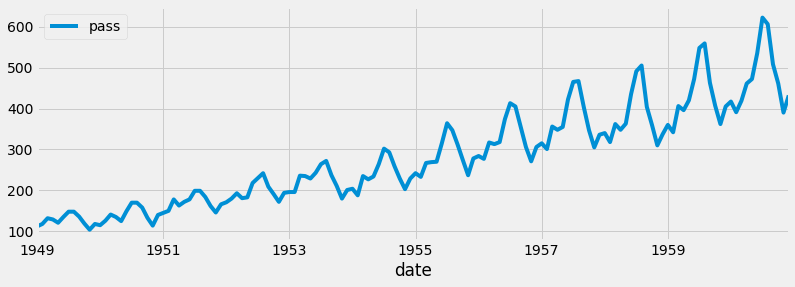

In [4]:
# Plotting
df.plot( figsize = (12, 4))
plt.show()

### Boxplot

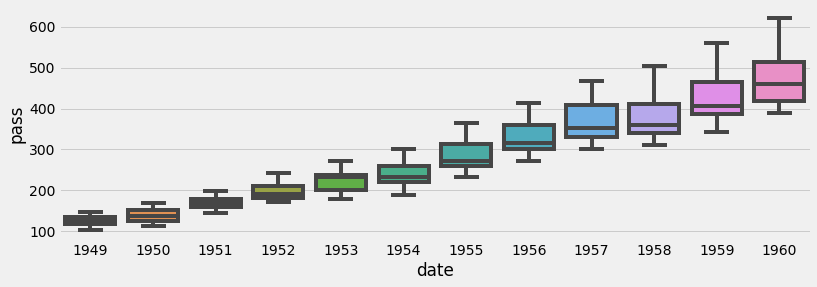

In [5]:
# Boxplot
plt.figure(figsize = (12, 4))
sns.boxplot(y = df['pass'], x = df.index.year)
plt.show()

### Additive Decomposition

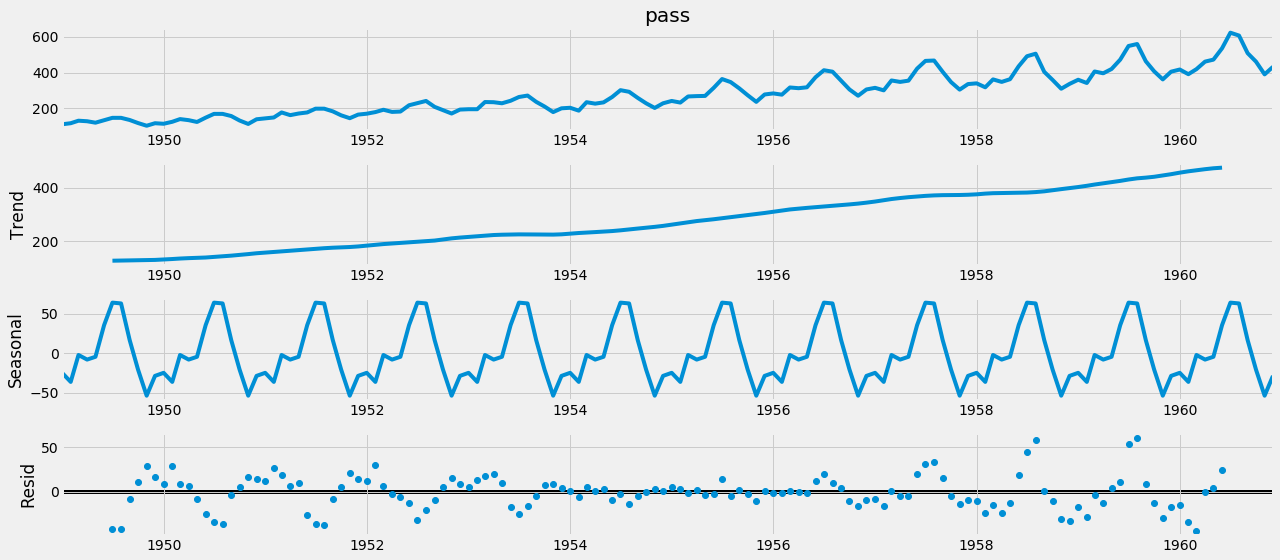

In [6]:
# Additive Decomposition
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 18, 8
decomposition = seasonal_decompose(df['pass'], model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

### Multiplicative Decomposition

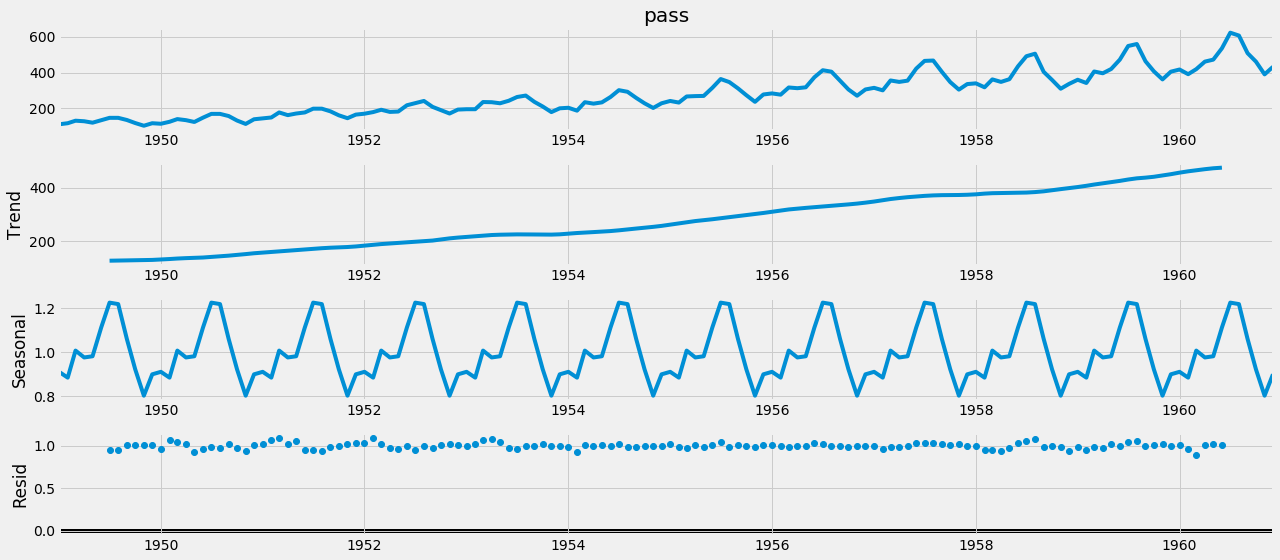

In [7]:
# Multiplicative Decomposition
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 18, 8
decomposition = seasonal_decompose(df['pass'], model = 'multiplicative')
fig = decomposition.plot()
plt.show()

### Stationarity Test

#### ADF Test

In [8]:
# Stationarity Test
from statsmodels.tsa.stattools import adfuller, kpss
adf_test = adfuller(df['pass'], )
print("p value ADF Test", adf_test[1])
"p value > 0.05 so fail to reject null hypothesis, so series is not stationary"

p value ADF Test 0.9918802434376411


'p value > 0.05 so fail to reject null hypothesis, so series is not stationary'

#### KPSS Test

In [9]:
kpss_test = kpss(df['pass'])
print("p value KPSS Test", kpss_test[1])
'p value < 0.05 so we reject null hypothesis which states series is stationary'

p value KPSS Test 0.01


C:\My_Programs\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\My_Programs\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


'p value < 0.05 so we reject null hypothesis which states series is stationary'

In [10]:
# Box cox transformation
from scipy.stats import boxcox
df['box_pass'] = boxcox(df['pass'], lmbda = 0)
df.head()

,pass,box_pass
date,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


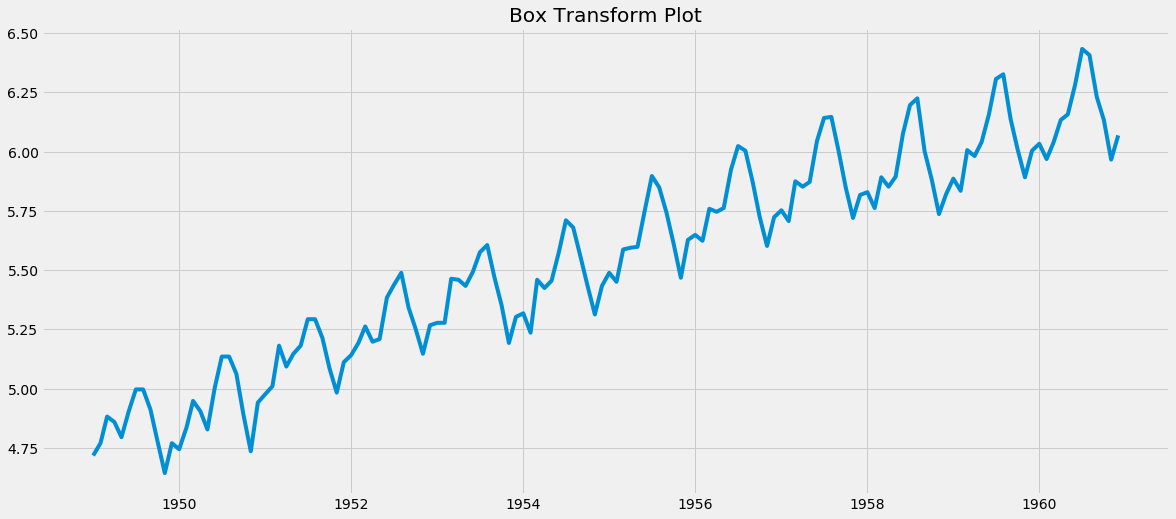

In [11]:
plt.plot(df['box_pass'])
plt.title("Box Transform Plot")
plt.show()

In [12]:
# 1st Differencing 
df['1st_box_pass'] = df['box_pass'].diff()


# 1st Testing
adf_test = adfuller(df['1st_box_pass'].dropna())
print("p Value ADF test", adf_test[1])
df.head()

p Value ADF test 0.07112054815085424


,pass,box_pass,1st_box_pass
date,,,
1949-01-01,112,4.718499,NaN
1949-02-01,118,4.770685,0.052186
1949-03-01,132,4.882802,0.112117
1949-04-01,129,4.859812,-0.022990
1949-05-01,121,4.795791,-0.064022


In [13]:
# 2nd differencing
df['2nd_box_pass'] = df['box_pass'].diff().diff()


# 2nd Testing
adf_test = adfuller(df['2nd_box_pass'].dropna())
print("p Value ADF test",adf_test[1])
df.head()

p Value ADF test 7.419304549380349e-13


,pass,box_pass,1st_box_pass,2nd_box_pass
date,,,,
1949-01-01,112,4.718499,NaN,NaN
1949-02-01,118,4.770685,0.052186,NaN
1949-03-01,132,4.882802,0.112117,0.059932
1949-04-01,129,4.859812,-0.022990,-0.135107
1949-05-01,121,4.795791,-0.064022,-0.041032


### ACF and PACF Plots

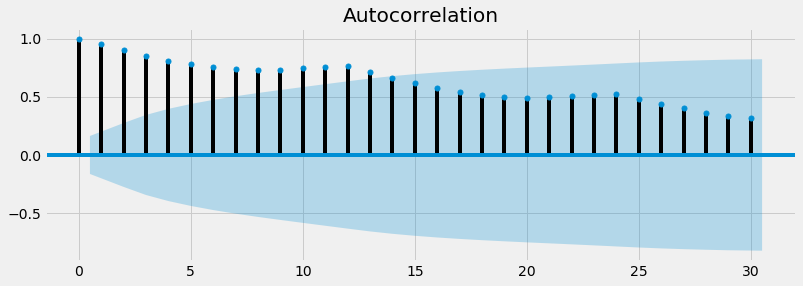

In [14]:
# ACF and PACF Plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize = (12, 4))
plot_acf(df['box_pass'], ax = plt.gca(), lags = 30)
plt.show()

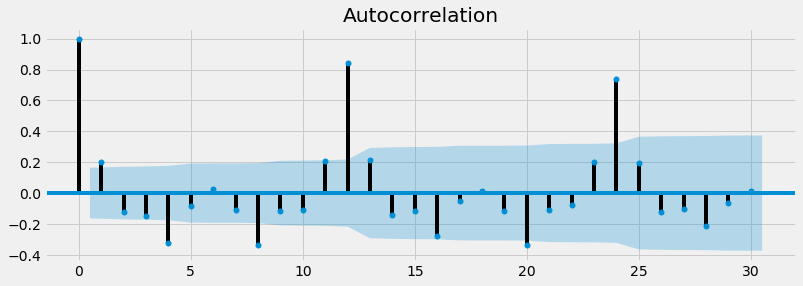

In [15]:
# 1st ACF Plot
plt.figure(figsize = (12, 4))
plot_acf(df['1st_box_pass'].dropna(), ax = plt.gca(), lags = 30)
plt.show()

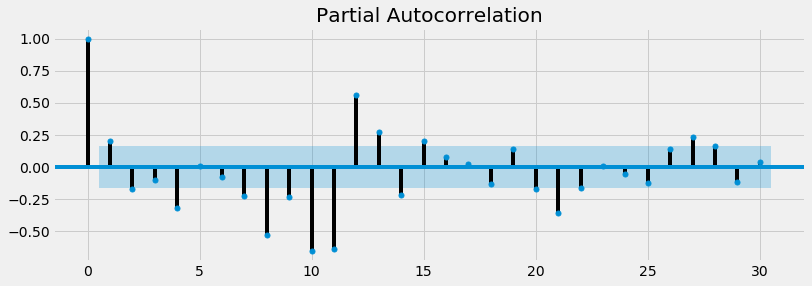

In [16]:
plt.figure(figsize = (12, 4))
plot_pacf(df['1st_box_pass'].dropna(), ax = plt.gca(), lags = 30)
plt.show()

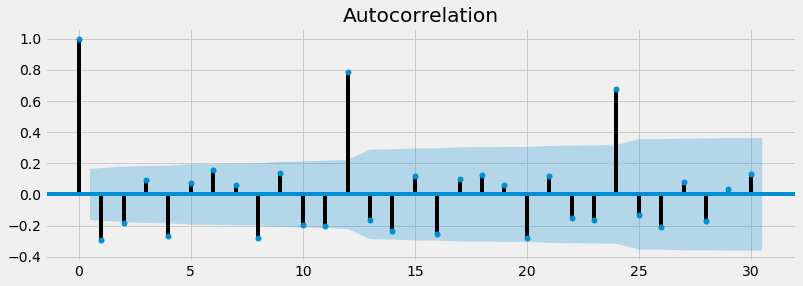

In [17]:
# 2nd ACF Plot
plt.figure(figsize = (12, 4))
plot_acf(df['2nd_box_pass'].dropna(), ax = plt.gca(), lags = 30)
plt.show()

C:\My_Programs\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


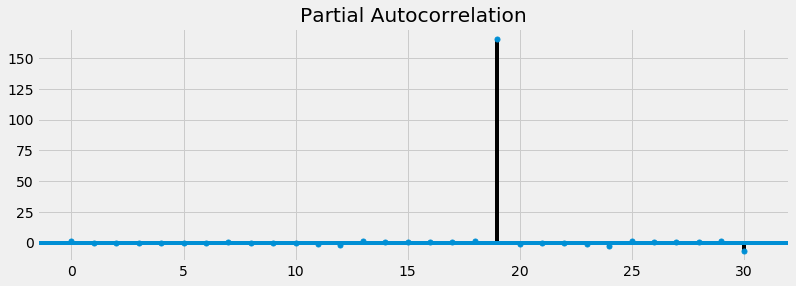

In [18]:
plt.figure(figsize = (12, 4))
plot_pacf(df['2nd_box_pass'].dropna(), ax = plt.gca(), lags = 30)
plt.show()

### Plotting Rolling Statistics

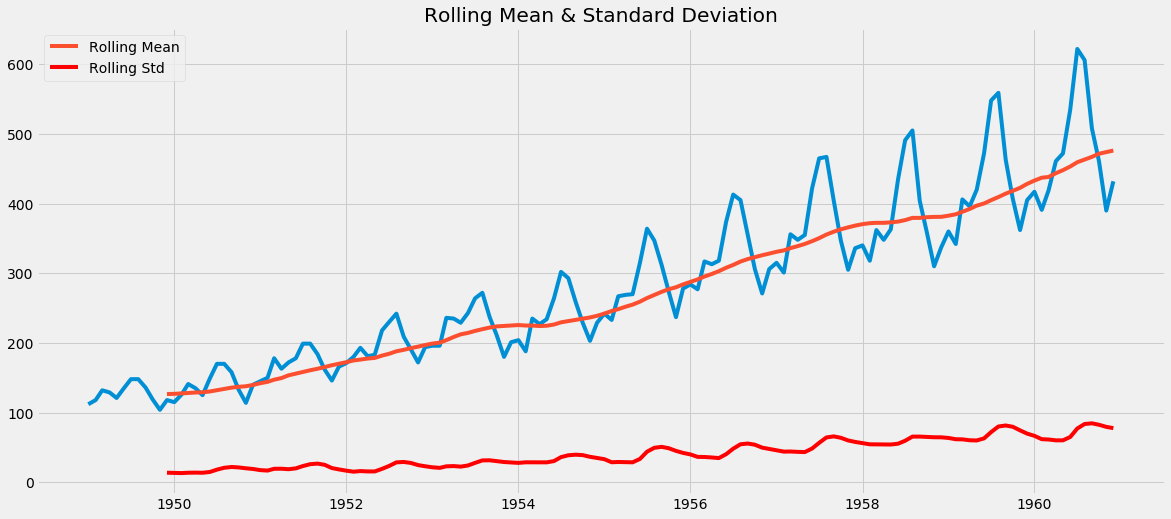

In [19]:
#Plotting Rolling Statistics
plt.style.use('fivethirtyeight')
rolmean = df['pass'].rolling(window  = 12).mean()
rolstd = df['pass'].rolling(window  = 12).std()
plt.plot(df['pass'])
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolstd, c = 'r', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [20]:
"""Making Time Series Stationary
There are 2 major reasons behind non-stationaruty of a TS:

Trend – varying mean over time. For eg, in this case we saw that on average,
 the number of passengers was growing over time.
 
Seasonality – variations at specific time-frames. eg people might have a 
tendency to buy cars in a particular month because of pay increment or 
festivals."""

df['pass_ma'] = rolmean
df.head(14)

,pass,box_pass,1st_box_pass,2nd_box_pass,pass_ma
date,,,,,
1949-01-01,112,4.718499,NaN,NaN,NaN
1949-02-01,118,4.770685,0.052186,NaN,NaN
1949-03-01,132,4.882802,0.112117,0.059932,NaN
1949-04-01,129,4.859812,-0.022990,-0.135107,NaN
1949-05-01,121,4.795791,-0.064022,-0.041032,NaN
1949-06-01,135,4.905275,0.109484,0.173506,NaN
1949-07-01,148,4.997212,0.091937,-0.017547,NaN
1949-08-01,148,4.997212,0.000000,-0.091937,NaN
1949-09-01,136,4.912655,-0.084557,-0.084557,NaN


In [21]:
box_rolmean = df['box_pass'].rolling(window = 12).mean()
df['box_pass_ma'] = box_rolmean
df.head(14)

,pass,box_pass,1st_box_pass,2nd_box_pass,pass_ma,box_pass_ma
date,,,,,,
1949-01-01,112,4.718499,NaN,NaN,NaN,NaN
1949-02-01,118,4.770685,0.052186,NaN,NaN,NaN
1949-03-01,132,4.882802,0.112117,0.059932,NaN,NaN
1949-04-01,129,4.859812,-0.022990,-0.135107,NaN,NaN
1949-05-01,121,4.795791,-0.064022,-0.041032,NaN,NaN
1949-06-01,135,4.905275,0.109484,0.173506,NaN,NaN
1949-07-01,148,4.997212,0.091937,-0.017547,NaN,NaN
1949-08-01,148,4.997212,0.000000,-0.091937,NaN,NaN
1949-09-01,136,4.912655,-0.084557,-0.084557,NaN,NaN


In [22]:
df['ts_box_diff'] = df['box_pass'] - df['box_pass_ma']
df.head(14)

,pass,box_pass,1st_box_pass,2nd_box_pass,pass_ma,box_pass_ma,ts_box_diff
date,,,,,,,
1949-01-01,112,4.718499,NaN,NaN,NaN,NaN,NaN
1949-02-01,118,4.770685,0.052186,NaN,NaN,NaN,NaN
1949-03-01,132,4.882802,0.112117,0.059932,NaN,NaN,NaN
1949-04-01,129,4.859812,-0.022990,-0.135107,NaN,NaN,NaN
1949-05-01,121,4.795791,-0.064022,-0.041032,NaN,NaN,NaN
1949-06-01,135,4.905275,0.109484,0.173506,NaN,NaN,NaN
1949-07-01,148,4.997212,0.091937,-0.017547,NaN,NaN,NaN
1949-08-01,148,4.997212,0.000000,-0.091937,NaN,NaN,NaN
1949-09-01,136,4.912655,-0.084557,-0.084557,NaN,NaN,NaN


In [23]:
def test_stationarity(timeseries):
    timeseries = timeseries.dropna()
    plt.style.use('fivethirtyeight')
    avg_box_rolmean = timeseries.rolling(window  = 12).mean()
    std_box_rolstd = timeseries.rolling(window  = 12).std()
    plt.plot(timeseries)
    plt.plot(avg_box_rolmean, label='Rolling Mean')
    plt.plot(std_box_rolstd, c = 'r', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

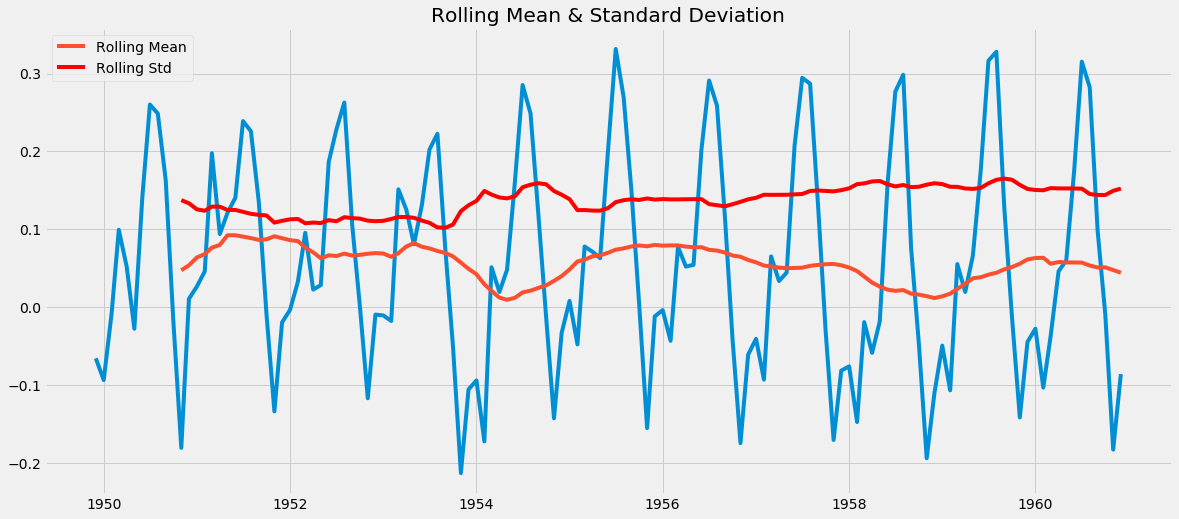

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [24]:
#Plotting Rolling Statistics and Testing ADF
test_stationarity(df['ts_box_diff'])

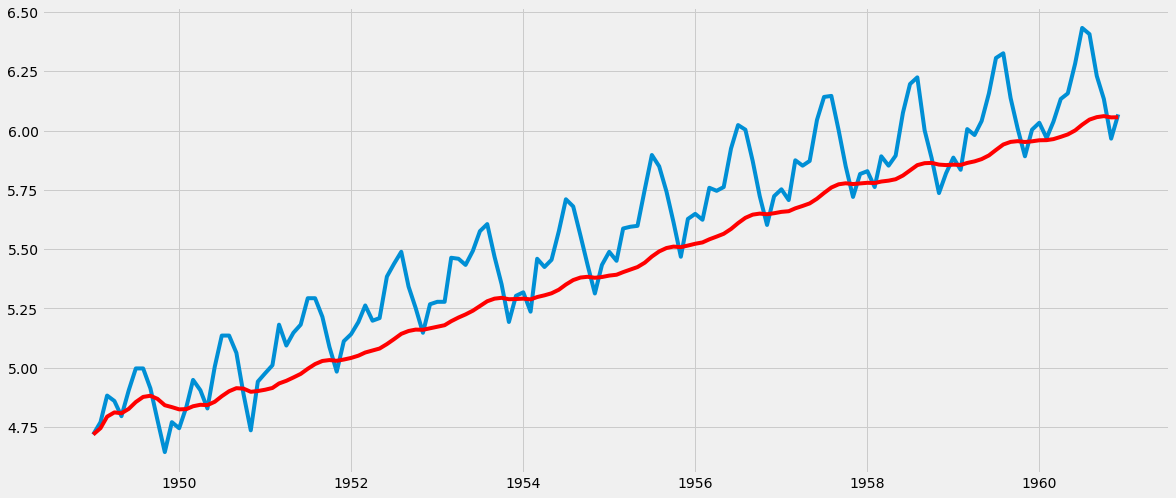

In [25]:
"""Exponentially weighted moving average:
To overcome the problem of choosing a defined window in moving average, we can 
use exponential weighted moving average
We take a ‘weighted moving average’ where more recent values are given a higher 
weight.

There can be many technique for assigning weights. A popular one is exponentially
weighted moving average where weights are assigned to all the previous values
with a decay factor."""
 
# Exponential Moving Average
expwighted_avg = df['box_pass'].ewm( halflife=12).mean()
plt.plot(df['box_pass'])
plt.plot(expwighted_avg, color='red') 
plt.show()

In [26]:
df['ewm_box_pass'] = expwighted_avg
df.head()

,pass,box_pass,1st_box_pass,2nd_box_pass,pass_ma,box_pass_ma,ts_box_diff,ewm_box_pass
date,,,,,,,,
1949-01-01,112,4.718499,NaN,NaN,NaN,NaN,NaN,4.718499
1949-02-01,118,4.770685,0.052186,NaN,NaN,NaN,NaN,4.745345
1949-03-01,132,4.882802,0.112117,0.059932,NaN,NaN,NaN,4.793835
1949-04-01,129,4.859812,-0.022990,-0.135107,NaN,NaN,NaN,4.811785
1949-05-01,121,4.795791,-0.064022,-0.041032,NaN,NaN,NaN,4.808206


In [27]:
df.tail()

,pass,box_pass,1st_box_pass,2nd_box_pass,pass_ma,box_pass_ma,ts_box_diff,ewm_box_pass
date,,,,,,,,
1960-08-01,606,6.406880,-0.026060,-0.176733,463.333333,6.124517,0.282363,6.046445
1960-09-01,508,6.230481,-0.176399,-0.150338,467.083333,6.132246,0.098235,6.056778
1960-10-01,461,6.133398,-0.097083,0.079315,471.583333,6.142628,-0.009230,6.061079
1960-11-01,390,5.966147,-0.167251,-0.070168,473.916667,6.148837,-0.182690,6.055750
1960-12-01,432,6.068426,0.102279,0.269530,476.166667,6.154215,-0.085789,6.056461


In [28]:
df['ewm_box_pass_diff']  = df['box_pass'] - df['ewm_box_pass']
df.head()

,pass,box_pass,1st_box_pass,2nd_box_pass,pass_ma,box_pass_ma,ts_box_diff,ewm_box_pass,ewm_box_pass_diff
date,,,,,,,,,
1949-01-01,112,4.718499,NaN,NaN,NaN,NaN,NaN,4.718499,0.000000
1949-02-01,118,4.770685,0.052186,NaN,NaN,NaN,NaN,4.745345,0.025339
1949-03-01,132,4.882802,0.112117,0.059932,NaN,NaN,NaN,4.793835,0.088967
1949-04-01,129,4.859812,-0.022990,-0.135107,NaN,NaN,NaN,4.811785,0.048028
1949-05-01,121,4.795791,-0.064022,-0.041032,NaN,NaN,NaN,4.808206,-0.012415


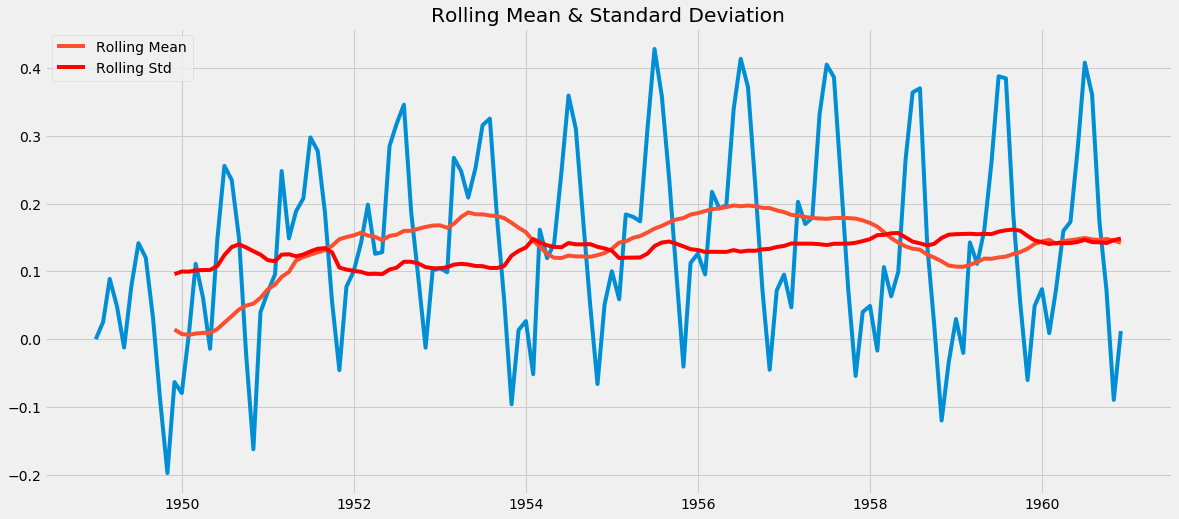

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [29]:
#Plotting Rolling Statistics and Testing ADF
test_stationarity(df['ewm_box_pass_diff'])

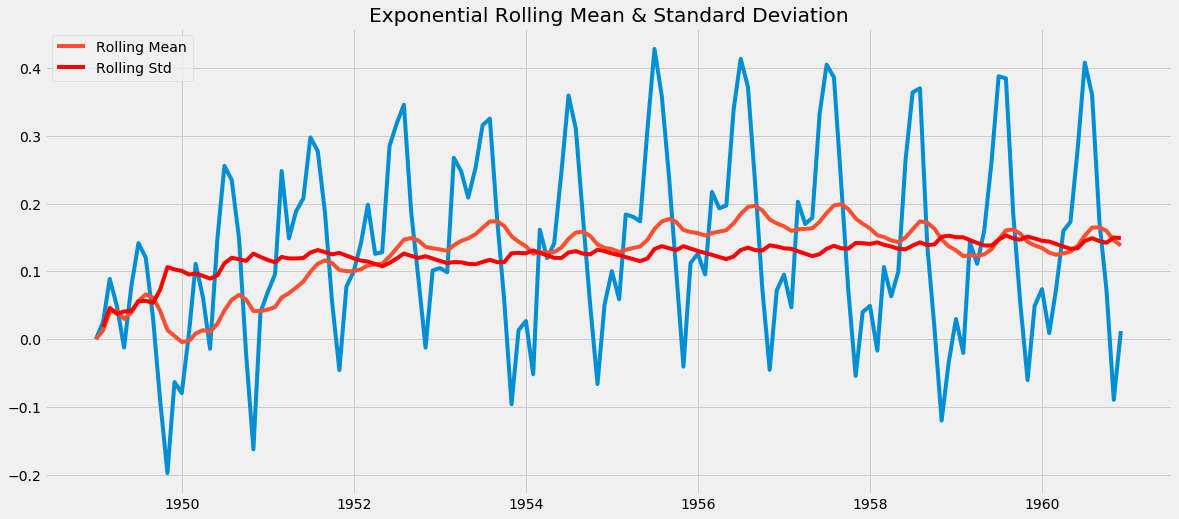

In [30]:
#Plotting Rolling Statistics
plt.style.use('fivethirtyeight')
ewm_avg_box_rolmean = df['ewm_box_pass_diff'].ewm( halflife=12).mean()
ewm_std_box_rolstd = df['ewm_box_pass_diff'].ewm( halflife=12).std()
plt.plot(df['ewm_box_pass_diff'])
plt.plot(ewm_avg_box_rolmean, label='Rolling Mean')
plt.plot(ewm_std_box_rolstd, c = 'r', label='Rolling Std')
plt.legend(loc='best')
plt.title('Exponential Rolling Mean & Standard Deviation')
plt.show()

In [31]:
"""Differencing
In this technique, we take the difference of the observation at a particular 
instant with that at the previous instant.
First order differencing in Pandas"""


df['box_diff'] = df['box_pass'] - df['box_pass'].shift()
df.head()

,pass,box_pass,1st_box_pass,2nd_box_pass,pass_ma,box_pass_ma,ts_box_diff,ewm_box_pass,ewm_box_pass_diff,box_diff
date,,,,,,,,,,
1949-01-01,112,4.718499,NaN,NaN,NaN,NaN,NaN,4.718499,0.000000,NaN
1949-02-01,118,4.770685,0.052186,NaN,NaN,NaN,NaN,4.745345,0.025339,0.052186
1949-03-01,132,4.882802,0.112117,0.059932,NaN,NaN,NaN,4.793835,0.088967,0.112117
1949-04-01,129,4.859812,-0.022990,-0.135107,NaN,NaN,NaN,4.811785,0.048028,-0.022990
1949-05-01,121,4.795791,-0.064022,-0.041032,NaN,NaN,NaN,4.808206,-0.012415,-0.064022


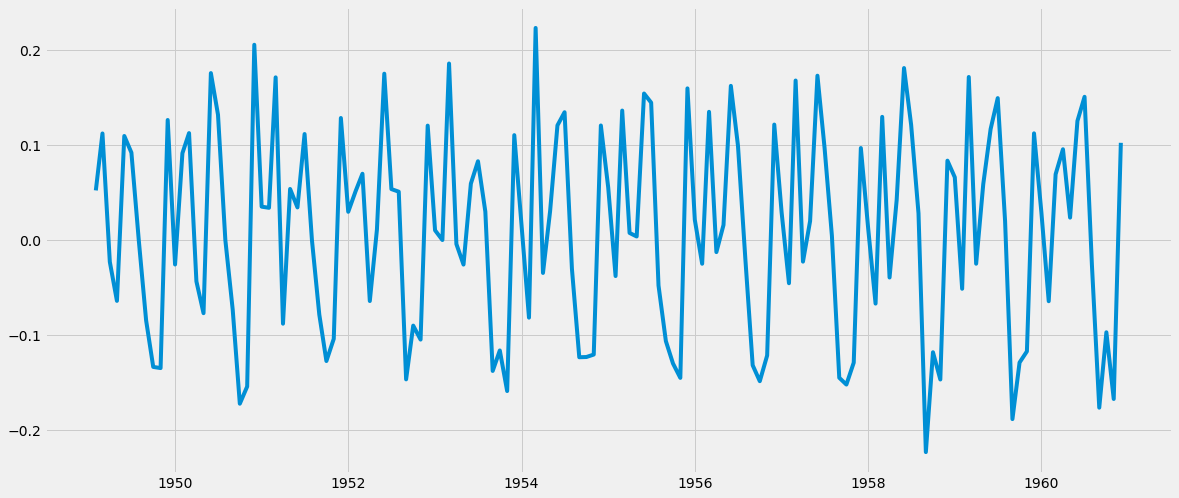

In [32]:
plt.plot(df['box_diff'].dropna())

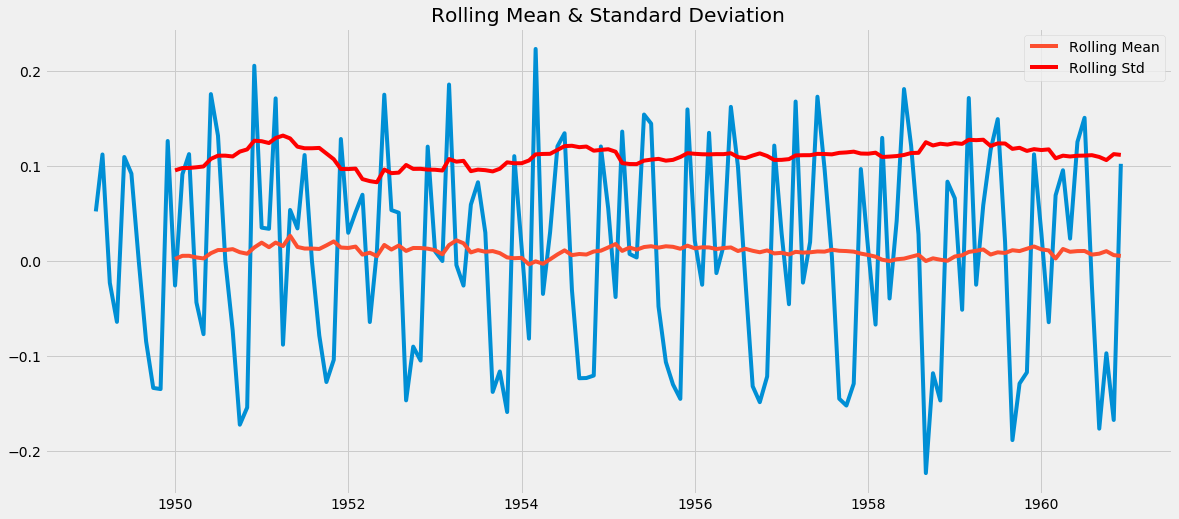

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [33]:
#Plotting Rolling Statistics and Testing ADF
test_stationarity(df['box_diff'])

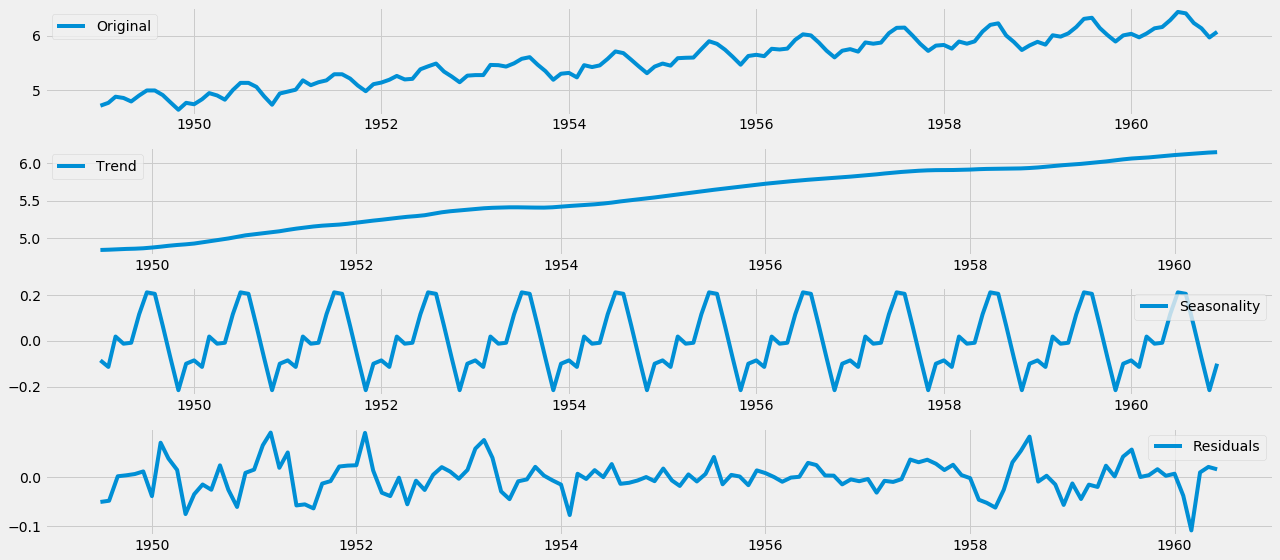

In [34]:
"""Decomposition
In this approach, both trend and seasonality are modeled separately and the 
remaining part of the series is returned.
"""

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df[['box_pass']]) # DataFrame should be passed inside

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df['box_pass'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [35]:
df['resid'] = residual
df.head(14)

,pass,box_pass,1st_box_pass,2nd_box_pass,pass_ma,box_pass_ma,ts_box_diff,ewm_box_pass,ewm_box_pass_diff,box_diff,resid
date,,,,,,,,,,,
1949-01-01,112,4.718499,NaN,NaN,NaN,NaN,NaN,4.718499,0.000000,NaN,NaN
1949-02-01,118,4.770685,0.052186,NaN,NaN,NaN,NaN,4.745345,0.025339,0.052186,NaN
1949-03-01,132,4.882802,0.112117,0.059932,NaN,NaN,NaN,4.793835,0.088967,0.112117,NaN
1949-04-01,129,4.859812,-0.022990,-0.135107,NaN,NaN,NaN,4.811785,0.048028,-0.022990,NaN
1949-05-01,121,4.795791,-0.064022,-0.041032,NaN,NaN,NaN,4.808206,-0.012415,-0.064022,NaN
1949-06-01,135,4.905275,0.109484,0.173506,NaN,NaN,NaN,4.826807,0.078468,0.109484,NaN
1949-07-01,148,4.997212,0.091937,-0.017547,NaN,NaN,NaN,4.855564,0.141648,0.091937,-0.050884
1949-08-01,148,4.997212,0.000000,-0.091937,NaN,NaN,NaN,4.877049,0.120164,0.000000,-0.048415
1949-09-01,136,4.912655,-0.084557,-0.084557,NaN,NaN,NaN,4.881978,0.030677,-0.084557,0.001223


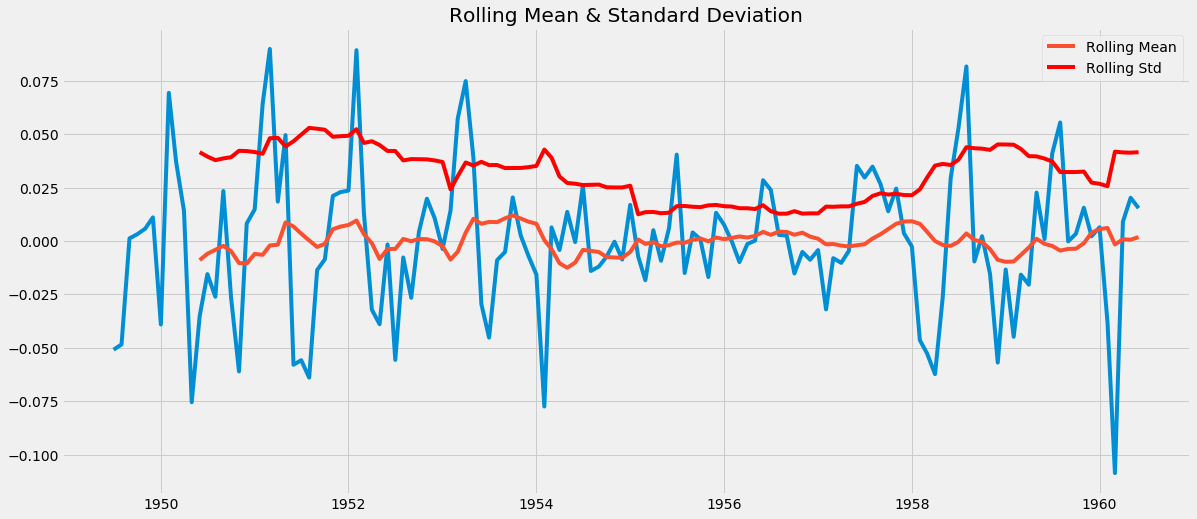

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [36]:
#Plotting Rolling Statistics and Testing ADF
test_stationarity(df['resid'])

# Time Series Forecasting

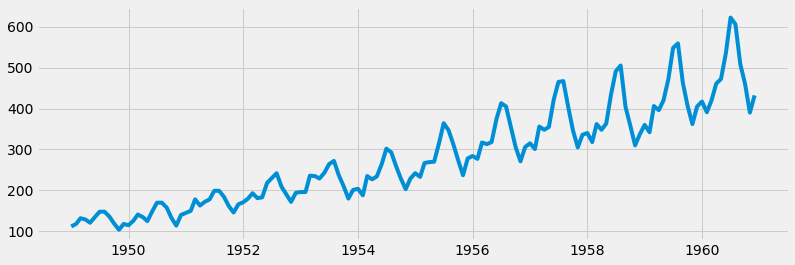

In [39]:
plt.figure(figsize = (12, 4))
plt.plot(df['pass'])
plt.show()

### Dividing to Train and Test Set


In [41]:
train = df.iloc[:120, :1]
test = df.iloc[120:, :1]
train.shape, test.shape

((120, 1), (24, 1))

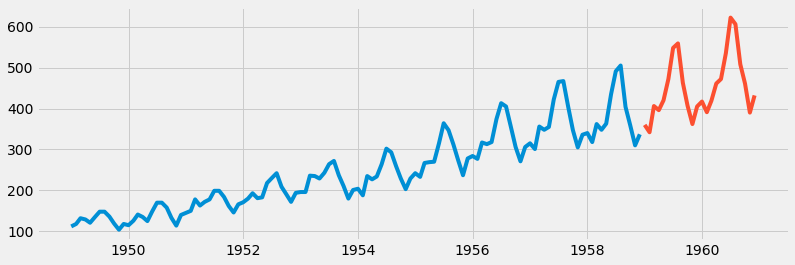

In [42]:
plt.figure(figsize = (12, 4))
plt.plot(train['pass'])
plt.plot(test['pass'])
plt.show()

### Naive Method

In [43]:
y_hat_naive = test.copy()

In [49]:
y_hat_naive['naive_forecast'] = train['pass'][119]
y_hat_naive.head()

,pass,naive_forecast
date,,
1959-01-01,360,337
1959-02-01,342,337
1959-03-01,406,337
1959-04-01,396,337
1959-05-01,420,337


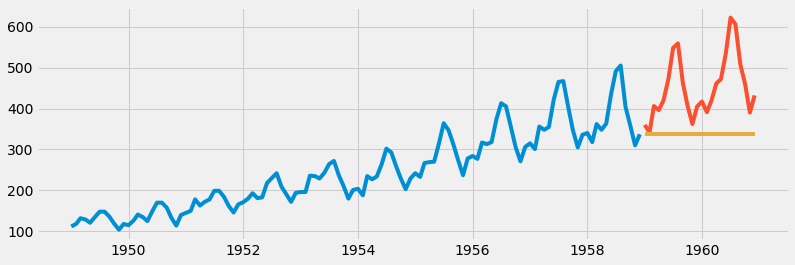

In [50]:
plt.figure(figsize = (12, 4))
plt.plot(train['pass'])
plt.plot(test['pass'])
plt.plot(y_hat_naive['naive_forecast'])
plt.show()

In [68]:
train['pass'].isnull().sum()

0

In [104]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
def evaluate(name, y_test , y_pred):
    R2_score = r2_score(y_test, y_pred).round(3)
    Mean_ae = mean_absolute_error(y_test, y_pred).round(3)
    Median_ae = median_absolute_error(y_test, y_pred).round(3)
    Mse = mean_squared_error(y_test, y_pred).round(3)
    Msle = mean_squared_log_error(y_test, y_pred).round(3)
    rmse = np.sqrt(mean_squared_error(y_test , y_pred)).round(3)
    mape = np.round(np.mean(np.abs(y_test -  y_pred)/y_test)*100, 3)
    return   pd.DataFrame({ "Method" : [name], 
                           "R2_Score" : [R2_score], 
                           "Mean_AE" : [Mean_ae],
                           "Median_AE" : [Median_ae], 
                           "MSE" : [Mse], 
                           "MSLE" : [Msle],
                           "RMSE" : [rmse], 
                           "MAPE" : [mape]})
    

In [105]:
# Evaluating Naive Method
naive_df = evaluate("Naive Method", test['pass'], y_hat_naive['naive_forecast'] )
naive_df

,Method,R2_Score,Mean_AE,Median_AE,MSE,MSLE,RMSE,MAPE
0,Naive Method,-2.382,115.25,89.0,18859.25,0.104,137.329,23.577


### Autoregression (AR)

- The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.

- Number of AR (Auto-Regressive) terms (p): p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

In [133]:
from statsmodels.tsa.arima_model import ARIMA
from random import random

In [134]:
# fit model
model = ARIMA(df['1st_box_pass'].dropna(), order = (1, 0, 0))
model_fit_AR = model.fit()

C:\My_Programs\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [135]:
print(model_fit_AR.params)

const                 0.009676
ar.L1.1st_box_pass    0.199665
dtype: float64


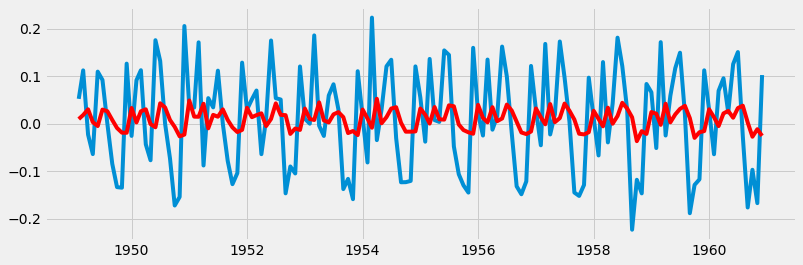

In [136]:
plt.figure(figsize = (12, 4))
plt.plot(df['1st_box_pass'].dropna())
plt.plot(model_fit_AR.fittedvalues, color='red')
plt.show()

In [137]:
print("RSS :", np.nansum((model_fit_AR.fittedvalues - df['1st_box_pass'].dropna())**2))

RSS : 1.5476170226761083


### Reversing the transformations
#### Fitted or predicted values:

In [138]:
predictions_AR_diff = pd.Series(model_fit_AR.fittedvalues, copy=True)
predictions_AR_diff.head()

date
1949-02-01    0.009676
1949-03-01    0.018164
1949-04-01    0.030130
1949-05-01    0.003154
1949-06-01   -0.005039
dtype: float64

#### Cumulative Sum to reverse differencing:

In [139]:
predictions_AR_diff_cumsum = predictions_AR_diff.cumsum()
predictions_AR_diff_cumsum.head()

date
1949-02-01    0.009676
1949-03-01    0.027839
1949-04-01    0.057969
1949-05-01    0.061123
1949-06-01    0.056084
dtype: float64

#### Adding 1st month value which was previously removed while differencing:

In [140]:
df['box_pass'].iloc[0]

4.718498871295094

In [141]:
predictions_AR_log = pd.Series(df['box_pass'].iloc[0], index = df.index)
predictions_AR_log.head()

date
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718499
1949-04-01    4.718499
1949-05-01    4.718499
dtype: float64

In [142]:
predictions_AR_log = predictions_AR_log.add(predictions_AR_diff_cumsum, fill_value = 0)
predictions_AR_log.head()

date
1949-01-01    4.718499
1949-02-01    4.728175
1949-03-01    4.746338
1949-04-01    4.776468
1949-05-01    4.779622
dtype: float64

#### Taking Exponent to reverse Log Transform:

In [143]:
predictions_AR = np.exp(predictions_AR_log)
predictions_AR.head()

date
1949-01-01    112.000000
1949-02-01    113.088945
1949-03-01    115.161806
1949-04-01    118.684402
1949-05-01    119.059282
dtype: float64

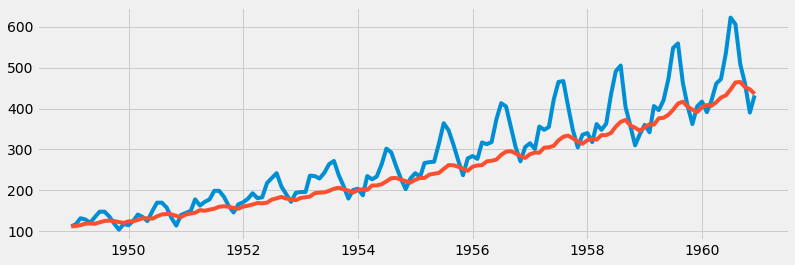

In [144]:
plt.figure(figsize = (12, 4))
plt.plot(df['pass'])
plt.plot(predictions_AR)
plt.show()

In [145]:
AR_model_df = evaluate('AR Model', df['pass'].iloc[120:], predictions_AR.iloc[120:])
AR_model_df

,Method,R2_Score,Mean_AE,Median_AE,MSE,MSLE,RMSE,MAPE
0,AR Model,0.013,53.546,42.973,5502.679,0.024,74.18,10.708


In [146]:
all_models = pd.concat([naive_df, AR_model_df], axis = 0)
all_models

,Method,R2_Score,Mean_AE,Median_AE,MSE,MSLE,RMSE,MAPE
0,Naive Method,-2.382,115.250,89.000,18859.250,0.104,137.329,23.577
0,AR Model,0.013,53.546,42.973,5502.679,0.024,74.180,10.708


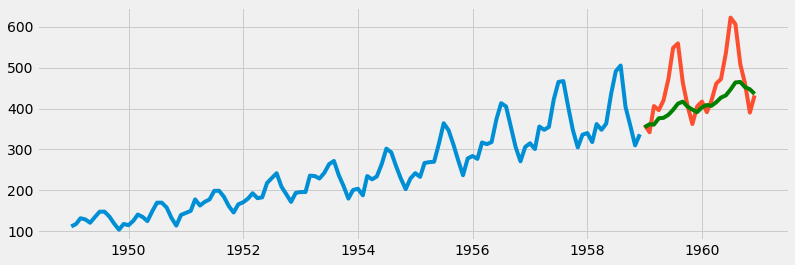

In [147]:
plt.figure(figsize = (12, 4))
plt.plot(df.iloc[:120, 0:1])
plt.plot(df.iloc[120:, 0:1])
plt.plot(predictions_AR[120:], c = 'g')
plt.show()

- RMSE has the benefit of penalizing large errors more so can be more appropriate in some cases, for example, if being off by 10 is more than twice as bad as being off by 5. But if being off by 10 is just twice as bad as being off by 5, then MAE is more appropriate.

- From an interpretation standpoint, MAE is clearly the winner. RMSE does not describe average error alone and has other implications that are more difficult to tease out and understand.

- On the other hand, one distinct advantage of RMSE over MAE is that RMSE avoids the use of taking the absolute value, which is undesirable in many mathematical calculations

### Moving Average 

- Number of MA (Moving Average) terms (q): q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

In [148]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(df['1st_box_pass'].dropna(), order = (0, 0, 1))
model_fit_MA = model.fit()

C:\My_Programs\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [149]:
model_fit_MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           1st_box_pass   No. Observations:                  143
Model:                     ARMA(0, 1)   Log Likelihood                 121.754
Method:                       css-mle   S.D. of innovations              0.103
Date:                Wed, 19 Aug 2020   AIC                           -237.507
Time:                        23:27:40   BIC                           -228.619
Sample:                    02-01-1949   HQIC                          -233.895
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0097      0.011      0.887      0.375      -0.012       0.031
ma.L1.1st_box_pass     0.2722      0.095      2.873      0.004       0.086       0.458
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -3.6744           +0.0000j            3.6744            0.5000
-----------------------------------------------------------------------------
"""

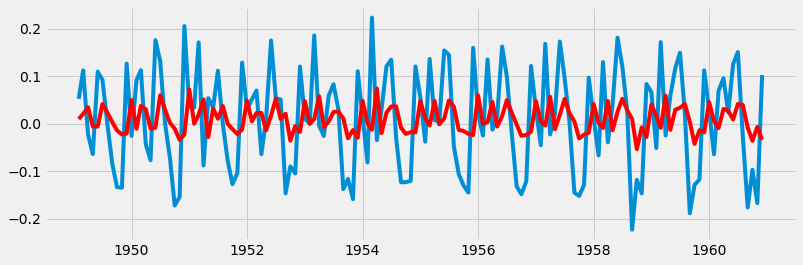

In [150]:
plt.figure(figsize = (12, 4))
plt.plot(df['1st_box_pass'].dropna())
plt.plot(model_fit_MA.fittedvalues, color='red')
plt.show()

In [151]:
print("RSS :", np.nansum((model_fit_MA.fittedvalues - df['1st_box_pass'].dropna())**2))

RSS : 1.524538157617147


In [152]:
print(model_fit_MA.params)

const                 0.009726
ma.L1.1st_box_pass    0.272150
dtype: float64


### Reversing the transformations
#### Fitted or predicted values:

In [153]:
predictions_MA_diff = pd.Series(model_fit.fittedvalues, copy=True)
predictions_MA_diff.head()

date
1949-02-01    0.009726
1949-03-01    0.020485
1949-04-01    0.034537
1949-05-01   -0.005924
1949-06-01   -0.006085
dtype: float64

#### Cumulative Sum to reverse differencing:

In [154]:
predictions_MA_diff_cumsum = predictions_MA_diff.cumsum()
predictions_MA_diff_cumsum.head()

date
1949-02-01    0.009726
1949-03-01    0.030211
1949-04-01    0.064748
1949-05-01    0.058824
1949-06-01    0.052739
dtype: float64

#### Adding 1st month value which was previously removed while differencing:

In [155]:
df['box_pass'].iloc[0]

4.718498871295094

In [156]:
predictions_MA_log = pd.Series(df['box_pass'].iloc[0], index = df.index)
predictions_MA_log.head()

date
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718499
1949-04-01    4.718499
1949-05-01    4.718499
dtype: float64

In [157]:
predictions_MA_log = predictions_MA_log.add(predictions_MA_diff_cumsum, fill_value = 0)
predictions_MA_log.head()

date
1949-01-01    4.718499
1949-02-01    4.728225
1949-03-01    4.748710
1949-04-01    4.783247
1949-05-01    4.777323
dtype: float64

#### Taking Exponent to reverse Log Transform:¶

In [158]:
predictions_MA = np.exp(predictions_MA_log)
predictions_MA.head()

date
1949-01-01    112.000000
1949-02-01    113.094633
1949-03-01    115.435226
1949-04-01    119.491679
1949-05-01    118.785908
dtype: float64

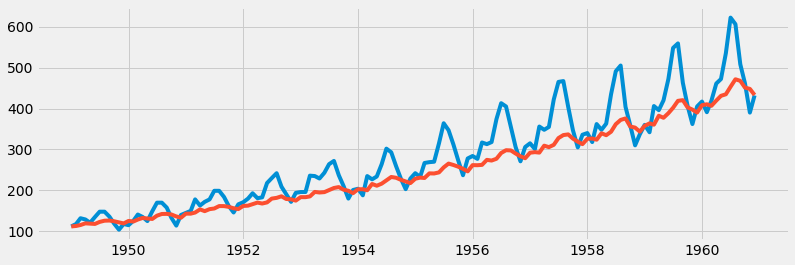

In [159]:
plt.figure(figsize = (12, 4))
plt.plot(df['pass'])
plt.plot(predictions_MA)
plt.show()

In [160]:
MA_model_df = evaluate('MA Model', df['pass'].iloc[120:], predictions_MA.iloc[120:])
MA_model_df

,Method,R2_Score,Mean_AE,Median_AE,MSE,MSLE,RMSE,MAPE
0,MA Model,0.091,51.211,40.714,5068.657,0.022,71.194,10.249


In [161]:
all_models = pd.concat([all_models, MA_model_df], axis = 0)
all_models

,Method,R2_Score,Mean_AE,Median_AE,MSE,MSLE,RMSE,MAPE
0,Naive Method,-2.382,115.250,89.000,18859.250,0.104,137.329,23.577
0,AR Model,0.013,53.546,42.973,5502.679,0.024,74.180,10.708
0,MA Model,0.091,51.211,40.714,5068.657,0.022,71.194,10.249


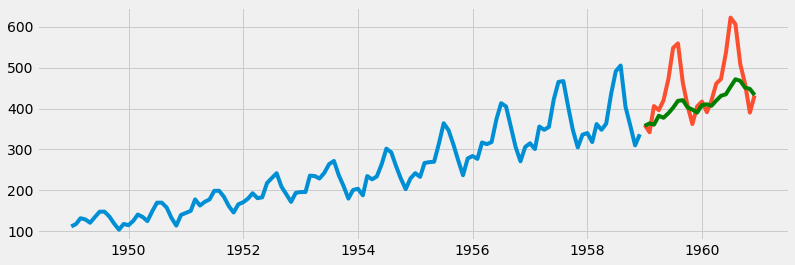

In [162]:
plt.figure(figsize = (12, 4))
plt.plot(df.iloc[:120, 0:1])
plt.plot(df.iloc[120:, 0:1])
plt.plot(predictions_MA.iloc[120:], c = 'g')
plt.show()